<a href="https://colab.research.google.com/github/daniel-lorenzo/Termodinamica/blob/master/Pr%C3%A1ctica_8/P8_Ejercicio_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 8
Para el siguiente proceso determinar:   
a) $m_c$    
b) $\Delta S_u$   
c) $\eta_{ex,proceso}$

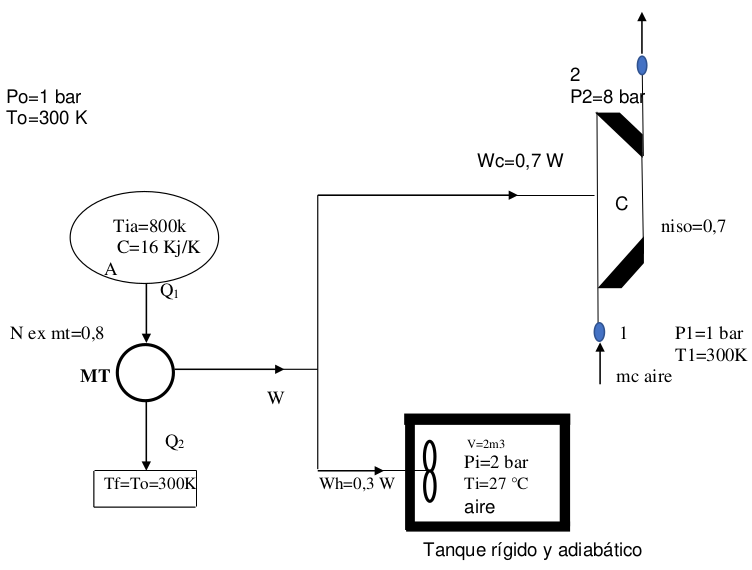

## Solución

---
### Máquina térmica

Temperatura final del cuerpo A
$$T_{fA} = T_0$$

Calor 1
$$Q_1 = c \cdot (T_{fA} - T_{iA})$$

Variación de entropía del cuerpo A
$$\Delta S_A = c \ln \frac{T_{fA}}{T_{iA}}$$

Calor útil 1
$$Q_{u1} = Q_1 - T_0 \Delta S_A$$

Calor útil 2
$$Q_{u2} = 0 \qquad \therefore \qquad T_F = T_0$$

Rendimiento exergético
$$\eta_{ex,MT} = \frac{|W_{MT}| + |Q_{u2}|}{|Q_{u1}|}$$

Despejamos $W_{MT}$
$$W_{MT} = \eta_{ex,MT} (|Q_{u1}| - |Q_{u2}|)$$

Trabajo
$$W_{MT} = |Q_1| + |Q_2|$$

Despejamos $Q_2$
$$Q_2 = |W_{MT}| - |Q_1|$$

Variación de entropía de la fuente
$$\Delta S_F = \frac{|Q_2|}{T_F}$$

---
### Compresor

Variación de entropía del compresor
$$\Delta S = m_c \left[ c_p \ln \frac{T_2}{T_1} - R \ln \frac{P_2}{P_1} \right]$$

Para el caso isoentrópico $\Delta S = 0$   
Despejamos $T_{2rev}$
$$0 = m_c \left[ c_p \ln \frac{T_{2rev}}{T_1} - R \ln \frac{P_2}{P_1} \right]$$

$$\frac{R}{c_p} \ln \frac{P_2}{P_1} = \ln \frac{T_{2rev}}{T_1}$$

$$e^{\frac{R}{c_p} \ln \frac{P_2}{P_1}} = \frac{T_{2rev}}{T_1}$$

Temperatura 2 ideal o reversible
$$T_{2rev} = T_1 e^{\frac{R}{c_p} \ln \frac{P_2}{P_1}}$$

Rendimiento isoentrópico
$$\eta_{iso} = \frac{W_{c,rev}}{W_c} = \frac{m c_p (T_{2rev} - T_1)}{m c_p(T_2 - T_1)}$$

Despejamos $T_2$
$$T_2 = \frac{T_{2rev} - T_1}{\eta_{iso}} + T_1$$

Primer principio
$$Q - W_c = \Delta H$$
$Q = 0$

$$-W_c = m_c c_p (T_2 - T_1)$$

Despejamos $m_c$
$$m_c = \frac{-W}{c_p (T_2 - T_1)}$$

Variación de entalpía
$$\Delta H_c = m_c c_p (T_2 - T_1)$$

Variación de entropía
$$\Delta S_c = m_c \left[ c_p \ln \frac{T_2}{T_1} - R \ln \frac{P_2}{P_1} \right]$$

Variación de exergía
$$\Delta Ex_c = \Delta H_c - T_0 \Delta S_c$$

---
### Tanque

Masa de aire en el tanque
$$m_t = \frac{P_i V}{R T}$$

Primer principio
$$Q - W_h = \Delta U$$

$Q=0$
$$-W_h = m_t c_v (T_f - T_i)$$

Despejamos $T_f$
$$T_f = \frac{-W_h}{m_t c_v} + T_i$$

Variación de entropía en el tanque
$$\Delta S_t = m_t \left[ c_v \ln \frac{T_f}{T_i} - R \ln \frac{V_f}{V_i} \right]$$

Variación de energía interna
$$\Delta U = m_t c_v (T_f - T_i)$$

Variación de exergía en el tanque
$$\Delta Ex_t = \Delta U - T_0  \Delta S_t$$

---
### Variación de entropía del universo
$$\Delta S_u = \Delta S_a + \Delta S_f + \Delta S_c + \Delta S_t$$

---
### Trabajo perdido
$$W_{perd} = T_0 \Delta S_u$$

---
### Rendimiento exergético

$$\eta_{ex} = \frac{|Q_{u2}| + |\Delta Ex_t| + |\Delta Ex_c|}{|Q_{u1}|}$$

---
### Python

In [ ]:
#@title Datos:
P_0 = 100 # [kPa]               Temperatura ambiente
T_0 = 300 # [K]                 Temperatura ambiente
# Máquina térmica
T_iA = 800 # [K]                Temperatura inicial cuerpo a
c = 16 # [kJ/K]                 Capacidad calorífica cuerpo a
η_exMT = 0.8  #                 Rendimiento exergético máquina térmica
T_F = T_0     #                 Temperatura fuente
# Tanque rígido y adiabático
P_i = 200 # [kPa]               Presión inicial en el tanque
T_i = 27+273 # [K]              Temperaruta inicial en el tanue
V = 2 # [m^3]                   Volumen del tanque
cv_aire = 0.7176 # [kJ/(kg·K)]
R_aire = 0.2870 # [kJ/(kg·K)]
# Compresor
η_isoC = 0.7  #                 Rendimiento isoentrópico del compresor
P_1 = 100 # [kPa]               Presión en el punto 1
T_1 = 300 # [K]                 Temperatura en el punto 1
P_2 = 800 # [kPa]               Presión en el punto 2
cp_aire = 1.0047 # [kJ/(kg·K)]

In [ ]:
import numpy as np

In [ ]:
#@title Máquina térmica
# Temperatura final del cuerpo A
T_fA = T_0
# Calor 1
Q_1 = c*(T_fA - T_iA)
# Variación de entropía del cuerpo A
ΔS_A = c*np.log(T_fA/T_iA)
# Calor útil 1
Q_u1 = Q_1 - T_0*ΔS_A
# Calor útil 2
Q_u2 = 0
# Trabajo máquina térmica
W_MT = η_exMT*abs(Q_u1 - Q_u2)
# Calor 2
Q_2 = abs(W_MT) - abs(Q_1)
# Variación de entropía de la fuente
ΔS_F = abs(Q_2)/T_F

In [ ]:
#@title Compresor
# Trabajo del compresor
W_C = -0.7*W_MT
# Temperatura 2 ideal o reversible
T_2rev = T_1*np.exp(R_aire/cp_aire*np.log(P_2/P_1))
# Temperatura 2
T_2 = (T_2rev - T_1)/η_isoC + T_1
# Flujo másico
m_c = -W_C/(cp_aire*(T_2 - T_1))
# Variación de entalpía
ΔH_c = m_c*cp_aire*(T_2 - T_1)
# Variación de entropía
ΔS_c = m_c*(cp_aire*np.log(T_2/T_1) - R_aire*np.log(P_2/P_1))
# Variación de exergía
ΔEx_c = ΔH_c - T_0*ΔS_c

In [ ]:
#@title Tanque
W_h = -0.3*W_MT
# Masa de aire en el tanque
m_t = (P_i*V)/(R_aire*T_i)
# Temperatura final
T_f = -W_h/(m_t*cv_aire) + T_i
# Variación de entropía en el tanque
ΔS_t = m_t*(cv_aire*np.log(T_f/T_i))
# Variación de energía interna
ΔU = m_t*cv_aire*(T_f - T_i)
# Variación de exergía en el tanque
ΔEx_t = ΔU - T_0*ΔS_t

In [ ]:
#@title $\Delta S_u$, $\eta_{ex}$
# Variación de entropía del universo
ΔS_u = ΔS_A + ΔS_F + ΔS_c + ΔS_t
# Trabajo perdido
W_perd = T_0*ΔS_u
# Rendimiento exergético del proceso
η_ex = (Q_u2 + ΔEx_t + ΔEx_c)/abs(Q_u1)

In [ ]:
#@title Resultados
print("MÁQUINA TÉRMICA:")
print("T_fA = %.2f [K]"%T_fA)
print("|Q_1| = %.0f [kJ]"%abs(Q_1))
print("ΔS_A = %.3f [kJ/K]"%ΔS_A)
print("|Q_u1| = %.2f [kJ]"%abs(Q_u1))
print("|Q_u2| = %.1f [kJ]"%abs(Q_u2))
print("W_MT = %.3f [kJ]"%W_MT)
print("|Q_2| = %.3f [kJ]"%abs(Q_2))
print("ΔS_F = %.3f [kJ/K]"%ΔS_F)
print("\nCOMPRESOR:")
print("T_2rev = %.2f [K]"%T_2rev)
print("T_2 = %.2f [K]"%T_2)
print("m_c = %.2f [kg/s]"%m_c)
print("ΔS_c = %.3f [kJ/K]"%ΔS_c)
print("ΔEx_c = %.3f [kJ]"%ΔEx_c)
print("\nTANQUE:")
print("W_h = %.2f [kJ]"%W_h)
print("m_t = %.3f [kg]"%m_t)
print("T_f = %.2f [K]"%T_f)
print("ΔS_t = %.3f [kJ/K]"%ΔS_t)
print("ΔU = %.3f [kJ]"%ΔU)
print("ΔEx_t = %.3f [kJ]"%ΔEx_t)
print("\nVARIACIÓN DE ENTROPÍA DEL UNIVERSO:")
print("ΔS_u = %.3f [kJ/K]"%ΔS_u)
print("\nTRABAJO PERDIDO:")
print("W_perd = %.1f [kJ]"%W_perd)
print("\nRENDIMIENTO EXERGÉTICO DEL PROCESO:")
print("η_ex = %.3f"%η_ex)

MÁQUINA TÉRMICA:
T_fA = 300.00 [K]
|Q_1| = 8000 [kJ]
ΔS_A = -15.693 [kJ/K]
|Q_u1| = 3292.02 [kJ]
|Q_u2| = 0.0 [kJ]
W_MT = 2633.616 [kJ]
|Q_2| = 5366.384 [kJ]
ΔS_F = 17.888 [kJ/K]

COMPRESOR:
T_2rev = 543.37 [K]
T_2 = 647.67 [K]
m_c = 5.28 [kg/s]
ΔS_c = 0.931 [kJ/K]
ΔEx_c = 1564.206 [kJ]

TANQUE:
W_h = -790.08 [kJ]
m_t = 4.646 [kg]
T_f = 536.99 [K]
ΔS_t = 1.941 [kJ/K]
ΔU = 790.085 [kJ]
ΔEx_t = 207.802 [kJ]

VARIACIÓN DE ENTROPÍA DEL UNIVERSO:
ΔS_u = 5.067 [kJ/K]

TRABAJO PERDIDO:
W_perd = 1520.0 [kJ]

RENDIMIENTO EXERGÉTICO DEL PROCESO:
η_ex = 0.538
